# **Competencia 1 - CC6205 Natural Language Processing üìö**

Departamento de Ciencias de la Computaci√≥n, Universidad de Chile.

CC6205: Procesamiento de Lenguaje Natural - Oto√±o 2023



## **Objetivo**


 El objetivo de la competencia es predecir si un texto contiene discurso de odio, incivilidad o es un texto normal.

El discurso de odio es cualquier expresi√≥n que promueva o incite a la discriminaci√≥n, la hostilidad o la violencia hacia una persona o grupo de personas en una relaci√≥n asim√©trica de poder, tal como la raza, la etnia, el g√©nero, la orientaci√≥n sexual, la religi√≥n, la nacionalidad, una discapacidad u otra caracter√≠stica similar.

En cambio, la incivilidad se refiere a cualquier comportamiento o actitud que rompe las normas de respeto, cortes√≠a y consideraci√≥n en la interacci√≥n entre personas. Esta puede manifestarse de diversas formas, tal como insultos, ataques personales, sarcasmo, desprecio, entre otras.

En esta competencia tendr√°n a su disposici√≥n un dataset de textos con las etiquetas `odio`, `incivilidad` o `normal`. La mayor parte de los datos se encuentra en espa√±ol de Chile. Con estos datos, deber√°n entrenar un modelo que sea capaz de predecir la etiqueta de un texto dado.

El corpus para esta tarea se compone de 3 datasets:  
- [Multilingual Resources for Offensive Language Detection de Arango et al. (2022)](https://aclanthology.org/2022.woah-1.pdf#page=136)
- [Dataton UTFSM No To Hate (2022)](http://dataton.inf.utfsm.cl/)
- Datos generados usando la [API de GPT3 (modelo DaVinci 03)](https://platform.openai.com/docs/models/gpt-3).

Agradecimientos a los autores por compartir los datos y a David Miranda, Fabi√°n Diaz, Santiago Maass y Jorge Ortiz por revisar y reetiquetar los datos en el contexto del curso "Taller de Desarrollo de Proyectos de IA" (CC6409), Departamento de Ciencias de la Computaci√≥n, Universidad de Chile.

Los datos solo pueden ser usados con fines de investigaci√≥n y docencia. Est√° prohibida la difusi√≥n externa.



---


## **1. Introducci√≥n**


El problema a resolver consiste en clasificar un texto, en este caso, un tweet de la plataforma Twitter, en las categor√≠as `NORMAL`, `ODIO` o `INCIVILIDAD`. En t√©rminos formales, se busca desarrollar un modelo capaz de recibir como entrada uno de estos textos y proporcionar como salida su clasificaci√≥n (normal, odio o incivilidad).

Al analizar el conjunto de datos a clasificar, se identifica como uno de los principales desaf√≠os el hecho de que la mayor√≠a de los textos est√°n escritos en espa√±ol chileno, lo que genera dificultades para clasificar ciertas palabras debido a la presencia de numerosos modismos, abreviaturas y formas de expresi√≥n que difieren significativamente del espa√±ol neutro. Adem√°s, se debe considerar la presencia de elementos adicionales en un tweet, como emojis, menciones, urls, entre otros, que entregan contexto y pueden ayudar a entender mejor el texto y clasificarlo de manera adecuada. Por lo tanto, es necesario desarrollar un modelo capaz de comprender y analizar adecuadamente todos estos elementos para poder realizar una clasificaci√≥n precisa y confiable.

## **2. Representaciones**



En nuestro caso, al utilizar un modelo basado en redes neuronales (BERT), la representaci√≥n de los datos utilizada es basada en tokens:

- **Tokens especiales y codificaci√≥n**: Debemos representar los datos con tokens especiales. Al inicio de cada texto debe ir un token que indique desde donde empieza el texto hasta donde termina. En bert basico este token corresponde a `['CLS']`, el token de separaci√≥n `['SEP']` y el token de padding `['PAD']` entre los m√°s importantes.

Con esto un ejemplo seria, suponiendo un largo de 5:

"Hola mundo" -----> [ 'CLS', 'Hola', 'Mundo', 'SEP', 'PAD' ]

## **3. Algoritmos**


   BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje basado en redes neuronales profundas que se utiliza para resolver una amplia variedad de tareas relacionadas con el procesamiento del lenguaje natural, como el an√°lisis de sentimientos, la traducci√≥n autom√°tica y la respuesta autom√°tica a preguntas.

El algoritmo de BERT se basa en el uso de redes neuronales transformadoras bidireccionales (bidirectional transformers). Estas redes utilizan un mecanismo de atenci√≥n (attention mechanism) para procesar las palabras en una oraci√≥n de manera secuencial, tomando en cuenta tanto las palabras anteriores como las posteriores a la palabra actual.

La arquitectura de BERT consta de m√∫ltiples capas de redes neuronales transformadoras, cada una de las cuales procesa la informaci√≥n de manera bidireccional. Es decir, cada capa procesa la informaci√≥n en ambas direcciones: desde el principio de la oraci√≥n hacia el final y desde el final de la oraci√≥n hacia el principio.

Para entrenar el modelo, se utiliza un proceso conocido como pre-entrenamiento (pretraining). En este proceso, se entrena el modelo en grandes cantidades de datos no etiquetados, de modo que el modelo pueda aprender patrones generales en el lenguaje. Posteriormente, se ajusta el modelo a tareas espec√≠ficas utilizando datos etiquetados, en este caso clasificaci√≥n de tweet en espa√±ol de Chile.


## **4. M√©tricas de Evaluaci√≥n**


#### **Accuracy**

Esta m√©trica mide la presici√≥n del modelo, es decir, cuantas de las predicciones que realiz√≥ el modelo son realmente las correctas. En un caso de clasificaci√≥n binaria corresponde a:

\begin{equation}
\frac{TRUE_{positive} + TRUE_{negative}}{TOTAL}
\end{equation}

Donde el total corresponde al total de las predicciones, es decir, incluyendo los falsos positivos y negativos.

Esta m√©trica entrega valores entre 0 y 1, donde 1 representa un modelo con una alta precisi√≥n. Es importante tener en cuenta que la precisi√≥n perfecta (1) no siempre es posible (la gran mayoria de las veces), y el nivel √≥ptimo de precisi√≥n depende del contexto y los objetivos del modelo.

#### **Kappa**

La m√©trica Kappa es m√°s robusta que Accuracy, ya que mide la concordancia de las predicciones del modelo, es decir, la capacidad del modelo para acertar una etiqueta por coincidencia o no. En palabras simples, mide si el modelo le achunt√≥ a la etiqueta por casualidad o por que de verdad sabia la respuesta. En t√©rminos matem√°ticos:

\begin{equation}
\kappa = \frac{P_{o} - P_{e}}{1 - P_{e}}
\end{equation}

Donde $P_{o}$ corresponde a la proporci√≥n entre predicciones correctas entre el total de predicciones, $P_{e}$ corresponde a la proporci√≥n de predicciones esperadas por casualidad y las clases verdaderas del modelo.

Esta m√©trica de validaci√≥n entrega valores entre -1 y 1, siendo el 1 un modelo con concordancia perfecta, 0 un modelo aleatorio y -1 un modelo con concordancia imperfecta.

#### **AUC**

La m√©trica Area Under Curve (AUC) como su nombre lo dice, corresponde a un area bajo la curva Receiver Operating Characteristic (ROC). Esta curva muestra gr√°ficamente la tasa de verdaderos positivos en funci√≥n de la tasa de falsos positivos. De esta forma AUC, representa la capacidad del modelo para distinguir entre las clases del modelo. Es la m√°s robusta de las tres m√©tricas anteriores entregando una buena validacion para la capacidad de generalizaci√≥n del modelo.

Esta m√©trica entrega valores entre 0 y 1, siendo 1 un modelo perfecto capaz de distinguir perfectamente entre las clases del modelo y 0.5 hacia abajo el modelo es totalmente aleatorio, entregando una clasificaci√≥n completamente al azar.

## **5. Dise√±o experimental**


En la siguiente secci√≥n utilizaremos modelos basados en aprendizaje profundo, en especificos modelos Bert pre entrenados. Solo veran el codigo y resultados del √∫ltimo modelo que se envio a CodaLab, el resto de resultados los pueden ver en la secci√≥n correspondiente.

### An√°lisis exploratorio de los datos

- **An√°lisis del balance de las clases**: si existe desbalance en las clases se deberan aplicar t√©cnicas como oversampling, subsampling o t√©cnicas de regulaci√≥n de clases desequilibradas, como la penalizaci√≥n en los pesos de la clase mayoritaria. De esta forma se aumenta la capacidad de generalizaci√≥n del modelo.
- **An√°lisis de las palabras m√°s comunes en cada tipo de texto**: mediante nubes de palabras se quiere observar que palabras son m√°s comunes segun que tipo de texto, de esta forma es posible entender de mejor manera como el modelo esta clasificando los textos. De igual forma, es posible a√±adir alguna columna extra al conjunto de datos que indique la cantidad de veces que aparece `x` palabra en un determinado texto, bajo el supuesto de que esto pudiera ayudar al modelo.

### Pre procesamiento de los datos

- **Tokenizaci√≥n y codificaci√≥n del texto**: es necesario obtener los tokens de los textos a clasificar para posterior a esto codificarlos con el formato adecuado para que el modelo Bert pueda entrenarse y clasificar. Para esto, basta con entender un par de librerias y como funciona el modelo por dentro, para luego crear una funci√≥n que tokenice y codifique el conjunto de datos.

### Construcci√≥n del modelo

Para la contrucci√≥n del modelo, se utilizar√° como base un modelo pre entrenado, a√±adiendole una capa extra de clasificaci√≥n. La capa final.

Tambi√©n se evaluara el largo de las cadenas de textos ya codificadas para definir un `MAX_LEN` que se utilizara en el entrenamiento de los datos.

### Entrenamiento y evaluaci√≥n

**Entrenamiento**: Esta parte es la de mayor experimentaci√≥n por parte del equipo, ya que ser√° necesario optimizar los hiperparametros del modelo. En este punto, debemos definir:

- **Divisi√≥n de los datos**: Mediante el uso de la libreria Skcit-learn se dividir√°n los datos de entrenamiento de la siguiente manera: 80% para entrenamiento y 20% para validaci√≥n, de los cuales la mitad ser√° para testear el modelo, es decir, 10% para evaluar durante el entrenamiento y 10% para testear y obtener las m√©tricas importantes de evaluaci√≥n del modelo.
- **Funcion de perdida del modelo**: Se utilizara una funci√≥n de la libreria pytorch llamada cross entropy loss. As√≠ mismo si fuera necesario, se agregaran a esta los pesos en caso de usar penalizaci√≥n para balancear la clasificaci√≥n de las clases.
- **Optimizador**: Se utilizar√° AdamW para optimizar el modelo, ajustando par√°metros como el learning rate y el weight_decay.
- **Batch_size**: Mediante una funci√≥n que va tomando lotes de datos desde el conjunto de entrenamiento pasandoles al modelo para que aprenda, se debe definir el tama√±o de estos lotes. Teniendo en cuenta la memoria limitada de Google Colab, y los resultados m√°s √≥ptimos del modelo.
-N√∫meros de epocas: El modelo se entrenar√° durante un n√∫mero a definir de epocas, priorizando el no 'overfittear' el modelo.

**Evaluaci√≥n**: Este paso es de suma importancia ya que aqu√≠ se optimizaran los par√°metros antes mencionados del modelo. Algunas cosas a tener en cuenta:

- **Gr√°fico de p√©rdida evaluaci√≥n y entrenamiento**: Esta gr√°fica nos entregar√° informaci√≥n de vital importancia para determinar si el modelo se encuentra en overfitting o no.
- **M√©tricas de evaluaci√≥n**: Estan corresponden a las ya explicadas anteriormente y F1-score, Recall y presicion.
- **Matriz de confusi√≥n**: Esta visualizaci√≥n de las predicciones sera importante para ir monitoreando los verdaderos positivos de cada clase, y determinar si un modelo es mejor que otro.

Por √∫ltimo, estos pason ser√°n repetidos probando diferentes modelos, hasta encontrar el mejor modelo para la tarea de clasificaci√≥n.


## **6. Experimentos**


### Importar librer√≠as


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.0/7.0 MB 57.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200.1/200.1 kB 24.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 83.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, accuracy_score
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

### Definir m√©todos de evaluaci√≥n (**NO tocar este c√≥digo**)

Estas funciones est√°n a cargo de evaluar los resultados del modelo.


In [ ]:
def auc_score(test_set, predicted_set):
    high_predicted = np.array([prediction[2] for prediction in predicted_set])
    medium_predicted = np.array(
        [prediction[1] for prediction in predicted_set]
    )
    low_predicted = np.array([prediction[0] for prediction in predicted_set])
    inc_test = np.where(test_set == "incivilidad", 1.0, 0.0)
    odio_test = np.where(test_set == "odio", 1.0, 0.0)
    normal_test = np.where(test_set == "normal", 1.0, 0.0)
    auc_high = roc_auc_score(inc_test, high_predicted)
    auc_med = roc_auc_score(odio_test, medium_predicted)
    auc_low = roc_auc_score(normal_test, low_predicted)
    auc_w = (
        normal_test.sum() * auc_low
        + odio_test.sum() * auc_med
        + inc_test.sum() * auc_high
    ) / (normal_test.sum() + odio_test.sum() + inc_test.sum())
    return auc_w


def evaluate(predicted_probabilities, y_test, labels):
    # Importante: al transformar los arreglos de probabilidad a clases,
    # entregar el arreglo de clases aprendido por el clasificador.
    # (que comunmente, es distinto a ['normal', 'odio', 'incivilidad'])
    predicted_labels = [
        labels[np.argmax(item)] for item in predicted_probabilities
    ]

    print("Matriz de confusi√≥n")
    print(
        confusion_matrix(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )

    print("\nReporte de clasificaci√≥n:\n")
    print(
        classification_report(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )
    # Reorder predicted probabilities array.
    labels = labels.tolist()

    predicted_probabilities = predicted_probabilities[
        :,
        [
            labels.index("normal"),
            labels.index("odio"),
            labels.index("incivilidad"),
        ],
    ]

    auc = round(auc_score(y_test, predicted_probabilities), 3)
    print("M√©tricas:\n\nAUC: ", auc, end="\t")
    kappa = round(cohen_kappa_score(y_test, predicted_labels), 3)
    print("Kappa:", kappa, end="\t")
    accuracy = round(accuracy_score(y_test, predicted_labels), 3)
    print("Accuracy:", accuracy)
    print("------------------------------------------------------\n")
    return np.array([auc, kappa, accuracy])

### Datos de entrenamiento


In [ ]:
# Dataset de entrenamiento.
train = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/train/train.tsv", sep="\t")

### An√°lisis exploratorio de los datos de entrenamiento
En esta secci√≥n analizaremos el balance de los datos asi como tambi√©n los textos sobre los que trabajar√° el modelo de clasificaci√≥n.

In [ ]:
# Mirada del contenido
train.head()

id                                              texto        clase
0  12632                   ultimo choro se 2018 que delicia       normal
1   7451  Pero es una realidad para muchas mujeres en Ve...       normal
2   4211  MALDITA SEAS COMUNA DE √ëU√ëOA https://t.co/yN4E...  incivilidad
3  10199  Las tontas de  #PautaLibre con el tremendo üå∂üå∂ ...  incivilidad
4  11597  @user @user @user @user @user Devuelvete y and...         odio

In [ ]:
# Balance de los datos
train['clase'].value_counts()

incivilidad    5424
normal         4280
odio           2510
Name: clase, dtype: int64

In [ ]:
text_normal = " ".join(review for review in train.loc[train['clase'] == 'normal', 'texto'])
text_odio = " ".join(review for review in train.loc[train['clase'] == 'odio', 'texto'])
text_incivilidad = " ".join(review for review in train.loc[train['clase'] == 'incivilidad', 'texto'])
print ("Hay {} palabras en los textos de normal".format(len(text_normal)))
print ("Hay {} palabras en los textos de odio".format(len(text_odio)))
print ("Hay {} palabras en los textos de incivilidad".format(len(text_incivilidad)))

Hay 683270 palabras en los textos de normal
Hay 476833 palabras en los textos de odio
Hay 698371 palabras en los textos de incivilidad


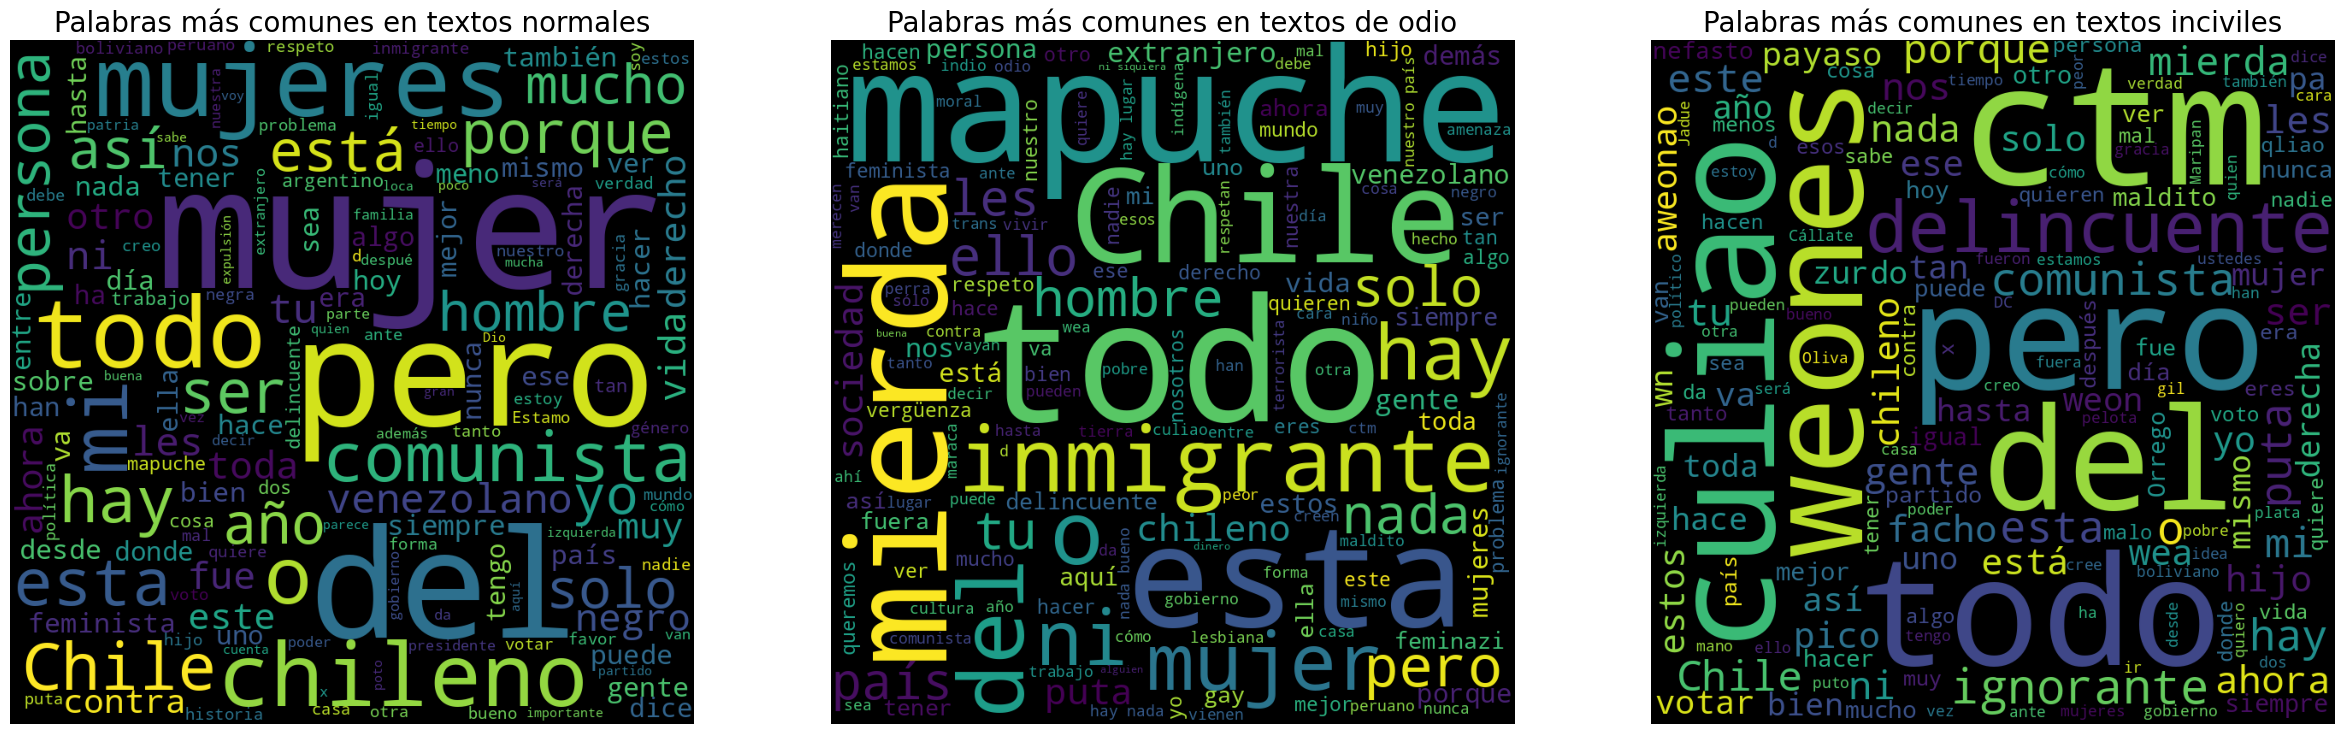

In [ ]:
# Quiero observar las palabras m√°s comunes en cada tipo de texto
import wordcloud
from keras.utils.text_dataset import text_dataset_from_directory
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Lista de stopwords:
stopwords = set(STOPWORDS)
stopwords.update(['y','que','https','el','lo','un','en','la','del'
'tu','las','ya','por','esa','las','eso','qu√©','sin','su','est√°n','esto'
'es','una','m√°s','mas','tiene','q','t','co','de','para','esto','los','son','con'
'se','le','al','cuando','e','user','como','es','si','tienen','se','con','del'
'pero','sus','te'
])

# Generando la nube de palabras
wordcloud_odio = WordCloud(width=800,height=800,max_font_size=200,
                           max_words=150,stopwords=stopwords
                           ,background_color="black").generate(text_odio)
wordcloud_normal = WordCloud(width=800,height=800,max_font_size=200,
                             max_words=150,stopwords=stopwords,
                             background_color="black").generate(text_normal)
wordcloud_incivilidad = WordCloud(width=800,height=800,max_font_size=200,
                                  max_words=150,stopwords=stopwords,
                                  background_color="black").generate(text_incivilidad)
# Creamos la figura y las subfiguras
fig, axs = plt.subplots(1, 3, figsize=(30, 15))

# Agregamos cada nube de palabras a una subfigura
axs[0].imshow(wordcloud_normal)
axs[0].axis('off')
axs[0].set_title('Palabras m√°s comunes en textos normales',fontsize = 20)
axs[1].imshow(wordcloud_odio)
axs[1].axis('off')
axs[1].set_title('Palabras m√°s comunes en textos de odio',fontsize = 20)
axs[2].imshow(wordcloud_incivilidad)
axs[2].axis('off')
axs[2].set_title('Palabras m√°s comunes en textos inciviles',fontsize = 20)
plt.show()

In [ ]:
# Columna contando las palabras m√°s comunes en cada tipo de texto y agregandolas al dataset en caso de utilizarlas

palabras_a_contar = [
    'mapuche','mierda','mujeres','mujer','culiao','delicuente','weones','puta','inmigrante','venezolano',
    'comunista','feminista','feminazi','ctm','ignorante','facho'
]

for palabra in palabras_a_contar:
    train[palabra] = train['texto'].str.count(palabra)
train.head()

id                                              texto        clase  \
0  12632                   ultimo choro se 2018 que delicia       normal   
1   7451  Pero es una realidad para muchas mujeres en Ve...       normal   
2   4211  MALDITA SEAS COMUNA DE √ëU√ëOA https://t.co/yN4E...  incivilidad   
3  10199  Las tontas de  #PautaLibre con el tremendo üå∂üå∂ ...  incivilidad   
4  11597  @user @user @user @user @user Devuelvete y and...         odio   

   mapuche  mierda  mujeres  mujer  culiao  delicuente  weones  puta  \
0        0       0        0      0       0           0       0     0   
1        0       0        1      1       0           0       0     0   
2        0       0        0      0       0           0       0     0   
3        0       0        0      0       0           0       0     0   
4        0       0        0      0       0           0       0     0   

   inmigrante  venezolano  comunista  feminista  feminazi  ctm  ignorante  \
0           0           0          0          0         0    0          0   
1           0           0          0          0         0    0          0   
2           0           0          0          0         0    0          0   
3           0           0          0          0         0    0          0   
4           0           0          0          0         0    0          0   

   facho  
0      0  
1      0  
2      0  
3      0  
4      0

#### Balance de clases

En esta secci√≥n intentamos balancear el conjunto de datos mediante una funci√≥n, esto no funciono de la manera que esperamos, por lo que desechamos la idea. Sin embargo, esta el c√≥digo utilizado:


```
def balancear_dataset(df):
    # Contar la cantidad de tweets por cada clase
    df_clases = df['label'].value_counts()
    # Obtener la cantidad de tweets de la clase con menos tweets
    minimo = df_clases.min()
    # Obtener las clases
    clases = df_clases.index.tolist()
    # Crear un dataframe vac√≠o
    df_balanceado = pd.DataFrame()
    # Iterar sobre las clases
    for clase in clases:
        # Obtener los tweets de la clase actual
        df_clase = df[df['label'] == clase]
        # Obtener una muestra de los tweets de la clase actual
        df_clase = df_clase.sample(n=minimo, random_state=42)
        # Agregar los tweets de la clase actual al dataframe balanceado
        df_balanceado = pd.concat([df_balanceado, df_clase])
    # Mezclar el dataframe balanceado
    df_balanceado = df_balanceado.sample(frac=1, random_state=42)
    return df_balanceado
```

Por lo tanto, decidimos utilizar penalizaci√≥n por peso a la clase mayoritaria en la red neuronal que utilizaremos m√°s adelante.


### El modelo
En primera instancia decidimos utilizar el modelo bert de base, pre entrenado con 100 idiomas distintos, entre ellos el espa√±ol. Sin embargo, mediante la investigaci√≥n y posterior implementaci√≥n de otros modelos decidimos descartarlo.


```
# Nombre del modelo
MODEL_NAME = "bert-base-multilingual-cased"

# Tokenizador del modelo
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
```
El siguiente modelo que probamos fue Beto, el cual tiene la misma arquitectura de un modelo Bert, pero con la diferencia que fue pre-entrenado solo con un corpus en espa√±ol. Este modelo fue entrenado por miembros del departamento de ciencias de la computaci√≥n (DCC) de la Universidad de Chile.



```
# Modelo Beto DCC uchile Cased
# Datos de vocabulario y parametros del modelo
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/config.json
!tar -xzvf pytorch_weights.tar.gz
!mv config.json pytorch/.
!mv vocab.txt pytorch/.

# Nombre del modelo
MODEL_NAME = "pytorch/"

#Tokenizador del modelo
tokenizer = BertTokenizer.from_pretrained("pytorch/", do_lower_case=False)
```

Beto nos dio buenos resultados, pero encontramos un modelo pre entrenado con Tweets de m√°s de 100 idiomas, y esto nos parecio relevante ya que se acercaba m√°s al dataset que tenemos.



In [ ]:
from transformers import AutoTokenizer, AutoModel

# Modelo bert pre entrenado en un corpus de Tweets
MODEL_NAME = 'Twitter/twhin-bert-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

>Es importante mencionar que Bert trabaja con los tokens que tiene en su vocabulario. En esta l√≠nea, Bert acepta un maximo de 512 Tokens por texto a clasificar.
>
>Dicho esto, nos interesa ver el tama√±o de los textos tokenizados para escoger el largo √≥ptimo.

Text(0.5, 0, 'Token count')

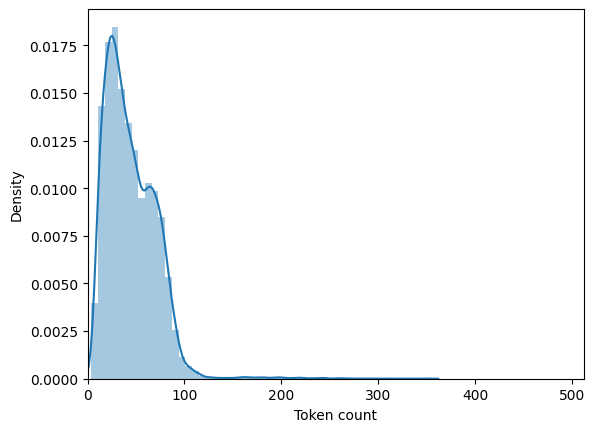

In [ ]:
# Lista que guarda el largo de cada texto del conjunto de datos
token_lens = []

# Iterando dentro del conjunto de datos
for txt in train.texto:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

# Gr√°fico que muestra la distribuci√≥n del largo de los textos
sns.distplot(token_lens)
plt.xlim([0, 512]);
plt.xlabel('Token count')

In [ ]:
# Ejemplo tokenizaci√≥n con Bert
sample_txt = 'Queremos quedar primeros para tener un 7 en la competencia'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print('Frase: ', sample_txt)
print('Tokens: ', tokens)
print('Tokens num√©ricos: ', token_ids) # Estos son los tokens que recibe el modelo m√°s unos tokens especiales que indican donde prestar atenci√≥n

Frase:  Queremos quedar primeros para tener un 7 en la competencia
Tokens:  ['‚ñÅQueremos', '‚ñÅquedar', '‚ñÅprimeros', '‚ñÅpara', '‚ñÅtener', '‚ñÅun', '‚ñÅ7', '‚ñÅen', '‚ñÅla', '‚ñÅcompetencia']
Tokens num√©ricos:  [205820, 38035, 82987, 121, 9574, 51, 361, 22, 21, 100562]


In [ ]:
# Ejemplo de codificaci√≥n para introducir a BERT
encoding = tokenizer.encode_plus(
    sample_txt,
    max_length = 15, # Este es el m√°ximo √≥ptimo que definimos
    truncation = True,
    add_special_tokens = True, # Estos son los tokens especiales ['<s>'] que indica lo que vamos a clasificar o ['</s>'] indica termino
    return_token_type_ids = False,
    pad_to_max_length = True, #Si el largo es menor a 15 lo rellena con tokens de Padding ['<pad>']
    return_attention_mask = True,
    return_tensors = 'pt'
)
encoding.keys()

print('Lo que recibe el modelo:',tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))
print('Representaci√≥n n√∫merica:',encoding['input_ids'][0])
print('A lo que debe prestarle atenci√≥n:',encoding['attention_mask'][0])



Lo que recibe el modelo: ['<s>', '‚ñÅQueremos', '‚ñÅquedar', '‚ñÅprimeros', '‚ñÅpara', '‚ñÅtener', '‚ñÅun', '‚ñÅ7', '‚ñÅen', '‚ñÅla', '‚ñÅcompetencia', '</s>', '<pad>', '<pad>', '<pad>']
Representaci√≥n n√∫merica: tensor([     0, 205820,  38035,  82987,    121,   9574,     51,    361,     22,
            21, 100562,      2,      1,      1,      1])
A lo que debe prestarle atenci√≥n: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])


In [ ]:
# En base al gr√°fico el largo adecuado es de 300 y el batch size √≥ptimo para no agotar la ram de la gpu
BATCH_SIZE = 32
MAX_LEN = 300

In [ ]:
# Random seed
RANDOM_SEED = 48
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Pre-procesamiento de los datos

Se pens√≥ en eliminar datos como hashtags, menciones, emojis y urls. Sin embargo, los modelos entrenados con este tipo de datos no daban buenos resultados, por lo que se descarto. Aqu√≠ el c√≥digo:


```
def preprocesar_texto(df, columna):
    # Eliminar links
    df[columna] = df[columna].str.replace(r'http\S+', '', case=False)
    # Eliminar menciones
    df[columna] = df[columna].str.replace(r'@\S+', '', case=False)
    # Eliminar hashtags
    df[columna] = df[columna].str.replace(r'#\S+', '', case=False)
    # Eliminar emojis
    df[columna] = df[columna].str.replace(r'\\U\w{8}', '', case=False)
    # Normalizar texto
    df[columna] = df[columna].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    return df
```



In [ ]:
# Etiquetado clases: De texto a n√∫mero para poder ingresarlas al modelo
clase_dict = {"normal": 0, "odio": 1, "incivilidad": 2}
train["label"] = train["clase"].map(clase_dict)
train.drop("clase", axis=1, inplace=True)
train.head()

NameError: ignored

In [ ]:
# Clase para codificar los datos para el modelo
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, texto, targets, tokenizer, max_len):
        self.texto = texto
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.texto)

    # get item magic method
    def __getitem__(self, item):
        texto = str(self.texto[item])
        target = self.targets[item]

        # Codificaci√≥n
        encoding = self.tokenizer.encode_plus(
            texto,
            add_special_tokens=True,
            truncation = True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': texto,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
# Divisi√≥n de entrenamiento para el modelo
# 80% train 10% testeo 10% evaluaci√≥n

df_train, df_test = train_test_split(train, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(9771, 19) (1221, 19) (1222, 19)


In [ ]:
# Data loader
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        texto=df.texto.to_numpy(),
        targets=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

In [ ]:
# Create train, test and val data loaders

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Numero de textos que se truncan
print('Numero de textos truncado a 300 tokens:\nTrain',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_train["texto"])))>300))
print('Validation:',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_val["texto"])))>300))
print('test:',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_test["texto"])))>300))


Numero de textos truncado a 300 tokens:
Train 1
Validation: 0
test: 0


In [ ]:
# Ejemplos batch_size, Largo_maximo
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

NameError: ignored

In [ ]:
# Build the Sentiment Classifier class
class SentimentClassifier(nn.Module):

    # Constructor class
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
       # self.bert = BertModel.from_pretrained("pytorch/",return_dict=False) Beto
        self.bert = AutoModel.from_pretrained(MODEL_NAME,return_dict=False)
        self.drop = nn.Dropout(p=0.1) #dropout de la capa de clasificaci√≥n para evitar overfitting
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) #Creaci√≥n de capa de clasificaci√≥n


    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  A√±adir capa de dropout
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
# Inicio del modelo como clasificador de 3 clases
class_names = ['normal','odio', 'incivilidad']

model = SentimentClassifier(len(class_names))
model = model.to(device)
model

Some weights of the model checkpoint at Twitter/twhin-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
              (distance_embedding): Embedding(1023, 64)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
        

In [ ]:
# N√∫mero de iteraciones, despues de varios experimentos es el n√∫mero √≥ptimo
EPOCHS = 3

# Optimizer Adam, ajuste de learning rate y weight_decay manual (VALOR √ìPTIMO)
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True,weight_decay=1e-2)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
# Para corregir el desbalance de los datos se penalizara la clase mayoritaria con un peso especifico
class_counts = {0: 4280, 1: 2510, 2: 5424}
total = sum(class_counts.values())
class_weights = [total/class_counts[i] for i in range(len(class_counts))]
class_weights_normalized = [w/sum(class_weights) for w in class_weights]
# Set the loss function
loss_fn = nn.CrossEntropyLoss(weight=torch.FloatTensor(class_weights_normalized).to(device))

In [ ]:
# Peso asignado a cada clase
print('Peso asignado a normal:',class_weights_normalized[0])
print('Peso asignado a odio:',class_weights_normalized[1])
print('Peso asignado a incivilidad:',class_weights_normalized[2])

Peso asignado a normal: 0.2861832313961056
Peso asignado a odio: 0.4879937172810087
Peso asignado a incivilidad: 0.2258230513228857


In [ ]:
# Function de entrenamiento
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # Backward prop
        loss.backward()

        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Funci√≥n de evaluaci√≥n sobre los datos de validacion, entrega metricas de precisi√≥n y perdida
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Para vaciar la GPU en caso de emergencia
torch.cuda.empty_cache()

### Entrenamiento del modelo

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/3
----------
Train loss 0.6408233199439017 accuracy 0.5891599803504176
Val   loss 0.49381642311047286 accuracy 0.8263718263718264

Epoch 2/3
----------
Train loss 0.3966900521000616 accuracy 0.682741116751269
Val   loss 0.45948637487032473 accuracy 0.8501228501228502

Epoch 3/3
----------
Train loss 0.2944163453150419 accuracy 0.715326674308171
Val   loss 0.4763242331070778 accuracy 0.8476658476658477

CPU times: user 24min 55s, sys: 41.8 s, total: 25min 37s
Wall time: 27min 50s


### Resultados entrenamiento

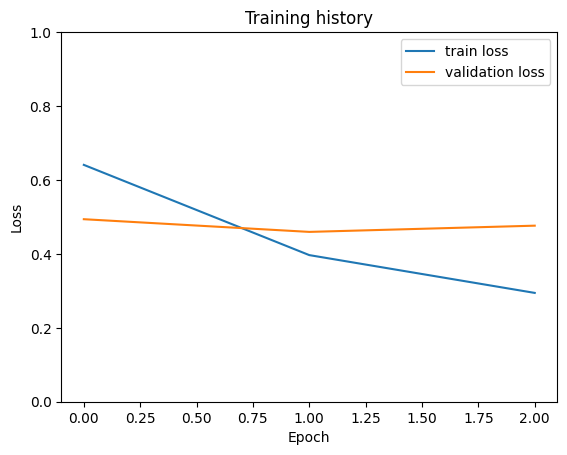

In [ ]:
# Gr√°fico del error de entrenamiento y de validaci√≥n en funci√≥n de las epocas de entrenamiento
# Para evaluar overfitting
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

# Graph chars
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
# Funci√≥n para predecir set de testeo y posterior set de target
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [ ]:
# Predictions on test_data_loader
y_review_texts, y_pred, y_pred_probs, y_test= get_predictions(
    model,
    test_data_loader
)

#### M√©tricas F1, Recall, precision.

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      normal       0.86      0.82      0.84       465
        odio       0.78      0.80      0.79       253
 incivilidad       0.85      0.87      0.86       504

    accuracy                           0.84      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.84      0.84      0.84      1222



#### Matriz de confusi√≥n

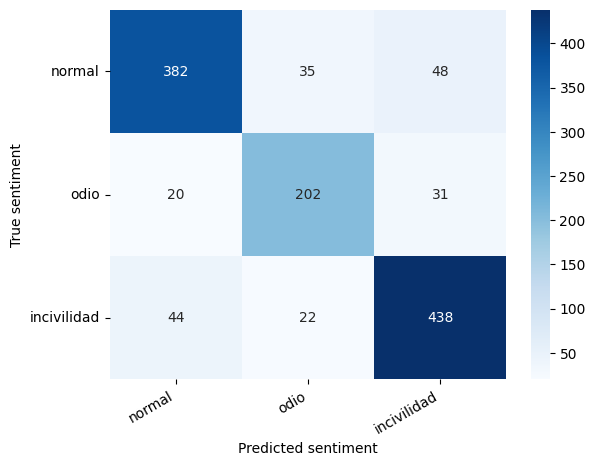

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
# Preparando los datos para la funcion evaluate
for index, row in df_test.iterrows():
    if row["label"] == 0:
        df_test.at[index, 'label'] = 'normal'
    elif row["label"] == 1:
        df_test.at[index, 'label'] = 'odio'
    elif row["label"] == 2:
        df_test.at[index, 'label'] = 'incivilidad'
df_test.head()

id                                              texto        label
11997  13208  @user @user La diferencia de todo lo que dec√≠s...       normal
2566    2162  @user Igual lo primordial es la responsabilida...  incivilidad
2798    6579  @user ¬øalguna gestion, alguna palabra de esto?...  incivilidad
11235  15100  dios odio ser tan auto exigente xq cada vez qu...  incivilidad
5216    5764  No vengan con esa wevaita de "no se levantaron...  incivilidad

In [ ]:
learned_labels = np.array(['normal','odio','incivilidad'])
y_probs = np.array(y_pred_probs)

#### M√©tricas AUC, Kappa y Presicion.

In [ ]:
evaluate(np.array(y_pred_probs), df_test['label'], learned_labels)

Matriz de confusi√≥n
[[382  35  48]
 [ 20 202  31]
 [ 44  22 438]]

Reporte de clasificaci√≥n:

              precision    recall  f1-score   support

      normal       0.86      0.82      0.84       465
        odio       0.78      0.80      0.79       253
 incivilidad       0.85      0.87      0.86       504

    accuracy                           0.84      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.84      0.84      0.84      1222

M√©tricas:

AUC:  0.948	Kappa: 0.745	Accuracy: 0.836
------------------------------------------------------



array([0.948, 0.745, 0.836])

### Predecir los target set y crear la submission

Aqu√≠ predecimos los target set usando los clasificadores creados y creamos los archivos de las submissions.


In [ ]:
# Dataset que deber√°n predecir para la competencia.
target = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/target/target.tsv", sep="\t")
target.head()


id                                              texto  clase
0   3236                              @user Ch√∫pame el pico    NaN
1   8185  Marico que ansiedad cuando veo un tweet de Tin...    NaN
2   4804                     Yapo weones es solo Melipilla.    NaN
3  12112  @user callate fecal de las manos negras del Sa...    NaN
4   2721  @user Jajajajaja justamente. Otra llegada de a...    NaN

In [ ]:
# Etiquetado clases numerica
clase_dict = {"normal": 0, "odio": 1, "incivilidad": 2}
target["label"] = target["clase"].map(clase_dict)
target.drop("clase", axis=1, inplace=True)
target.head()

id                                              texto  label
0   3236                              @user Ch√∫pame el pico    NaN
1   8185  Marico que ansiedad cuando veo un tweet de Tin...    NaN
2   4804                     Yapo weones es solo Melipilla.    NaN
3  12112  @user callate fecal de las manos negras del Sa...    NaN
4   2721  @user Jajajajaja justamente. Otra llegada de a...    NaN

In [ ]:
# Le entrego un valor a columna label con el fin d poder predecir
target.loc[target['label'].isna(), 'label'] = -1
target.head()

id                                              texto  label
0   3236                              @user Ch√∫pame el pico   -1.0
1   8185  Marico que ansiedad cuando veo un tweet de Tin...   -1.0
2   4804                     Yapo weones es solo Melipilla.   -1.0
3  12112  @user callate fecal de las manos negras del Sa...   -1.0
4   2721  @user Jajajajaja justamente. Otra llegada de a...   -1.0

In [ ]:
#Convertir en data loader para meterlo al modelo
target_data_loader = create_data_loader(target, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Predicciones
y_review_texts_target, y_pred_target, y_pred_probs_target, y_test_target= get_predictions(
    model,
    target_data_loader
)



In [ ]:
# Preparando el archivo para la entrega en codalab
incivilidad=pd.Series(y_pred_probs_target[:,2])
odio = pd.Series(y_pred_probs_target[:,1])
normal = pd.Series(y_pred_probs_target[:,0])
entrega=pd.DataFrame()
entrega['id']=target['id']
entrega['normal']=normal
entrega['odio']=odio
entrega['incivilidad']=incivilidad
entrega.head()

id    normal      odio  incivilidad
0   3236 -1.531518 -1.075869     3.831641
1   8185  1.554775 -1.683662     0.987090
2   4804 -1.333576 -1.545130     3.923675
3  12112 -0.035031  0.002518     0.678183
4   2721  3.001002 -2.257668    -0.360598

In [ ]:
import os
import shutil
# Crear carpeta ./predictions
if not os.path.exists("./predictions"):
    os.mkdir("./predictions")

else:
    # Eliminar predicciones anteriores:
    shutil.rmtree("./predictions")
    os.mkdir("./predictions")

# Guardar predicciones en archivos separados.
entrega.to_csv(
    "./predictions/prediction.txt", sep="\t", header=False, index=False
)

# Crear archivo zip
a = shutil.make_archive("predictions", "zip", "./predictions")

## **7. Resultados**

Algunos de los muchos experimentos que realizamos, con beto, obtuvimos las siguientes m√©tricas:

#### Modelo Beto_DCC

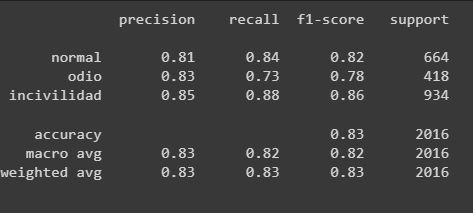

#### Modelo Twitter/twhin-bert-large (Modelo grande con m√°s parametros):

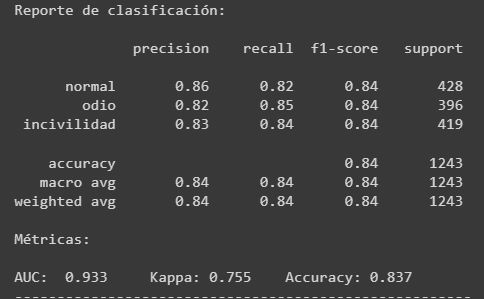

#### Modelo Twitter/twhin-bert-base

Uno de los problemas que estabamos teniendo era el overfitting. Para esto, realizamos varios experimentos variando parametros como learning rate, weight_decay, cantidad de epocas de entrenamiento, ajuste de pesos de la capa de clasificaci√≥n, etc.

Aqu√≠ se observa el problema de overfitting:

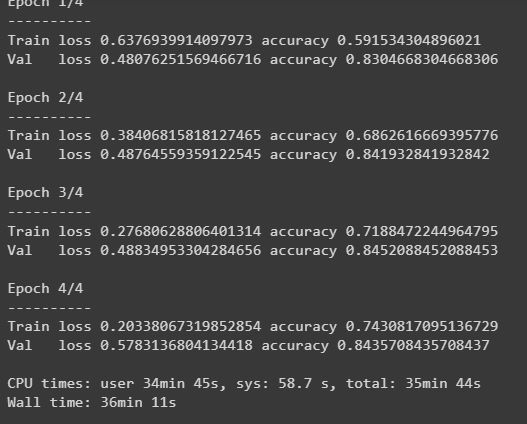

Se puede observar que las epocas √≥ptimas de entrenamiento estan entre 2 y 3.

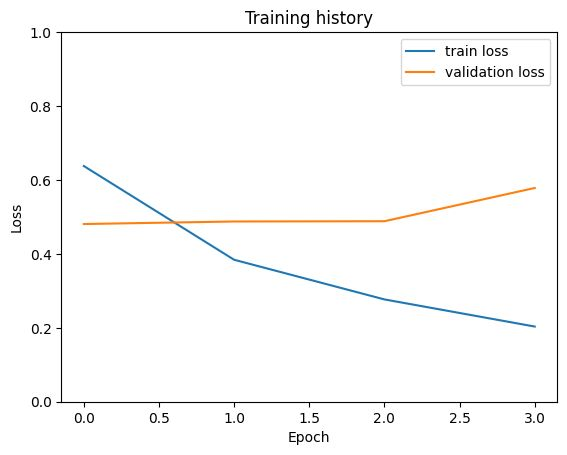

La matriz de confusi√≥n:

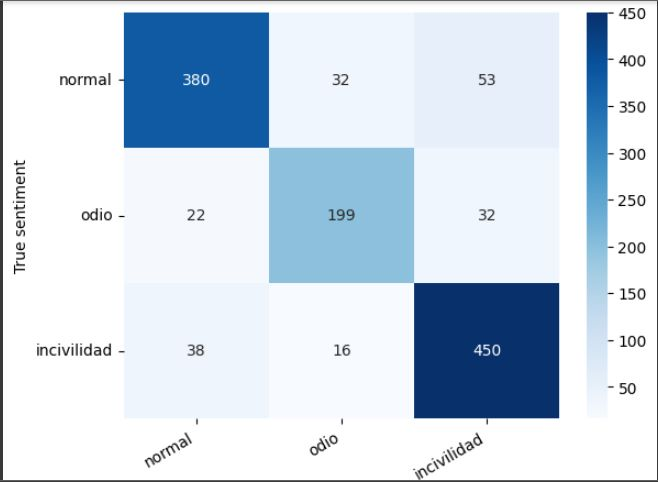

### Modelo Twitter/twhin-bert-base √∫ltimo experimento

El modelo no estaba generalizando de forma correcta, por lo que se ajustaron los parametros, dejandolos de manera √≥ptima para que no hubiera overfitting y obteniendo los resultados del modelo 6 en la tabla (el detalle se puede encontrar en "Resultados de entrenamiento").


| No. | Approach        |               | AUC   | Kappa | Accuracy |
| --- | --------------- | ------------- | ----- | ----- | -------- |
|     | Features        | Clasifier     |       |       |          |
| 1   | None | Bert-base-uncased |0.90 |0.68 |0.78 |
| 2   | None|Bert-base-multilingual-cased  |  0.90     |  0.75     |    0.84      |
|3|Penalizaci√≥n|Beto_DCC|0.92|0.73|0.83|
|4|Balanceo|Twitter/twhin-bert-base|0.93|0.74|0.82|
|5|None|Twitter/twhin-bert-large|0.93|0.76|0.84|
|6|Penalizaci√≥n|Twitter/twhin-bert-base|0.95|0.75|0.84|


## **8. Conclusiones**
En este trabajo, se abord√≥ el problema de la clasificaci√≥n de textos en espa√±ol de Chile en tres posibles categor√≠as: normal, odio e incivilidad. Se implement√≥ un modelo pre-entrenado BERT y se llevaron a cabo diversos experimentos para evaluar su rendimiento en la clasificaci√≥n de los textos. Se observ√≥ la importancia de la optimizaci√≥n del modelo para evitar overfitting y se presentaron los resultados obtenidos.

Durante la investigaci√≥n, se evidenci√≥ que la disponibilidad de datos en espa√±ol de Chile era limitada, lo que limit√≥ la capacidad de entrenamiento del modelo. Por lo tanto, se sugiere como trabajo futuro la creaci√≥n de un dataset recopilando informaci√≥n de Twitter. Asimismo, se reconoce que el modelo puede tener limitaciones en relaci√≥n a las caracter√≠sticas espec√≠ficas del idioma espa√±ol de Chile.

En conclusi√≥n, el modelo implementado demostr√≥ ser √∫til para la clasificaci√≥n de textos en espa√±ol de Chile en tres categor√≠as, pero se sugiere continuar investigando y mejorando el modelo en futuros trabajos. Se considera que este proyecto ha permitido una mayor comprensi√≥n de la importancia de la optimizaci√≥n de modelos y de la necesidad de disponer de suficientes datos para el entrenamiento efectivo de modelos de clasificaci√≥n de texto.